In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE, SelectKBest, chi2
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
di = pd.read_csv("PCOS_infertility.csv")

In [3]:
di.head()

,Sl. No,Patient File No.,PCOS (Y/N),I beta-HCG(mIU/mL),II beta-HCG(mIU/mL),AMH(ng/mL)
0,1,10001,0,1.99,1.99,2.07
1,2,10002,0,60.80,1.99,1.53
2,3,10003,1,494.08,494.08,6.63
3,4,10004,0,1.99,1.99,1.22
4,5,10005,0,801.45,801.45,2.26


In [4]:
di.describe()

,Sl. No,Patient File No.,PCOS (Y/N),I beta-HCG(mIU/mL),II beta-HCG(mIU/mL)
count,541.000000,541.000000,541.000000,541.000000,541.000000
mean,271.000000,10271.000000,0.327172,664.549235,238.229518
std,156.317519,156.317519,0.469615,3348.920576,1603.826221
min,1.000000,10001.000000,0.000000,1.300000,0.110417
25%,136.000000,10136.000000,0.000000,1.990000,1.990000
50%,271.000000,10271.000000,0.000000,20.000000,1.990000
75%,406.000000,10406.000000,1.000000,297.210000,97.630000
max,541.000000,10541.000000,1.000000,32460.970000,25000.000000


In [5]:
di.shape

(541, 6)

In [6]:
di.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sl. No                  541 non-null    int64  
 1   Patient File No.        541 non-null    int64  
 2   PCOS (Y/N)              541 non-null    int64  
 3     I   beta-HCG(mIU/mL)  541 non-null    float64
 4   II    beta-HCG(mIU/mL)  541 non-null    float64
 5   AMH(ng/mL)              541 non-null    object 
dtypes: float64(2), int64(3), object(1)
memory usage: 25.5+ KB


In [7]:
cat_values = di.select_dtypes(include=['object','bool']).columns.tolist()
cat_values

['AMH(ng/mL)']

In [8]:
di.isnull().sum()

,0
Sl. No,0
Patient File No.,0
PCOS (Y/N),0
I beta-HCG(mIU/mL),0
II beta-HCG(mIU/mL),0
AMH(ng/mL),0


In [9]:
di1=di.copy()
dii=di.copy()

In [10]:
# Convertir en numérique tout en remplaçant les erreurs par NaN
dii['AMH(ng/mL)_numeric'] = pd.to_numeric(dii['AMH(ng/mL)'], errors='coerce')

# Filtrer et afficher les valeurs problématiques
valeurs_problemes = dii[dii['AMH(ng/mL)_numeric'].isna()]['AMH(ng/mL)']
print(valeurs_problemes)

305    a
Name: AMH(ng/mL), dtype: object


In [11]:
label_encoder = LabelEncoder()
di1['AMH(ng/mL)_encoded'] = label_encoder.fit_transform(di1['AMH(ng/mL)'])
print(di1['AMH(ng/mL)'])
print(di1['AMH(ng/mL)_encoded'])

0      2.07
1      1.53
2      6.63
3      1.22
4      2.26
       ... 
536     1.7
537     5.6
538     3.7
539     5.2
540      20
Name: AMH(ng/mL), Length: 541, dtype: object
0      124
1       49
2      266
3       41
4      133
      ... 
536     59
537    243
538    198
539    234
540    160
Name: AMH(ng/mL)_encoded, Length: 541, dtype: int64


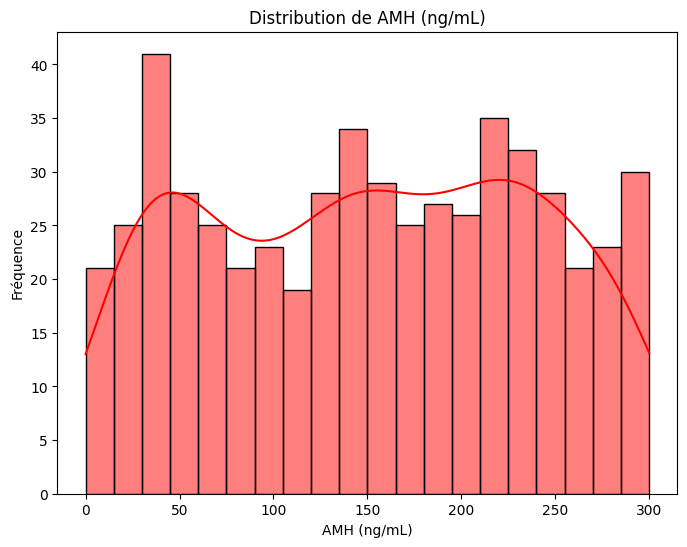

In [13]:
plt.figure(figsize=(8, 6))
sns.histplot(di1['AMH(ng/mL)_encoded'], kde=True, bins=20, color='red')
plt.title('Distribution de AMH (ng/mL)')
plt.xlabel('AMH (ng/mL)')
plt.ylabel('Fréquence')
plt.show()

<ipython-input-15-8c84ae952d5f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='PCOS (Y/N)', y='AMH(ng/mL)_encoded', data=di1, palette='Set2')


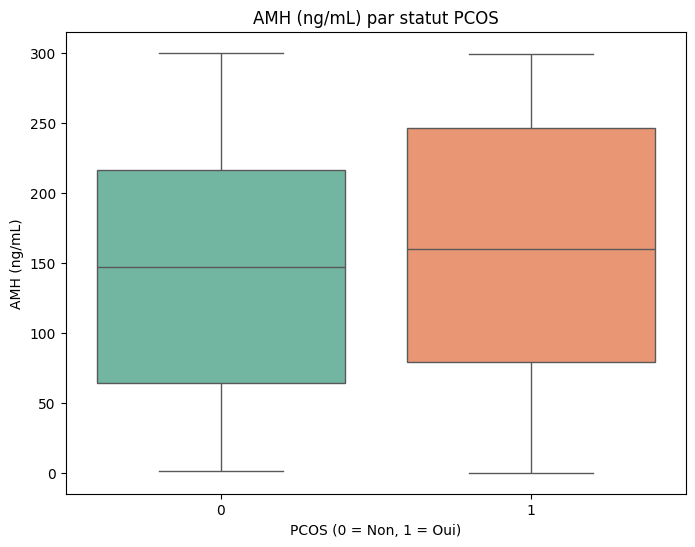

In [15]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='PCOS (Y/N)', y='AMH(ng/mL)_encoded', data=di1, palette='Set2')
plt.title('AMH (ng/mL) par statut PCOS')
plt.xlabel('PCOS (0 = Non, 1 = Oui)')
plt.ylabel('AMH (ng/mL)')
plt.show()

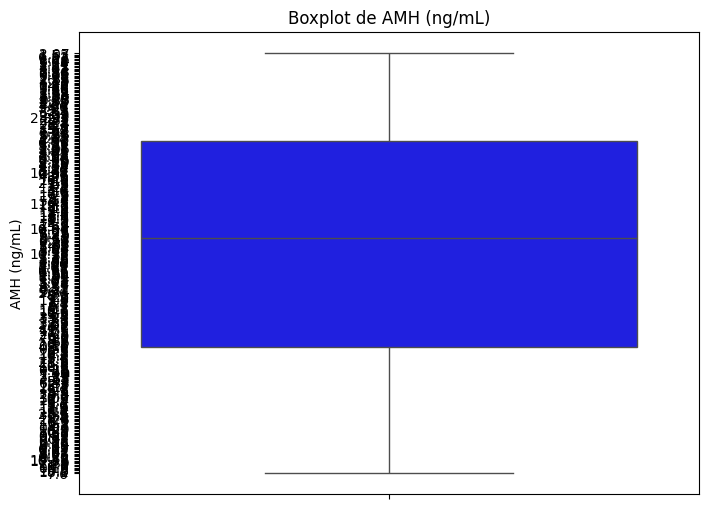

In [17]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=di1['AMH(ng/mL)'], color='blue')
plt.title('Boxplot de AMH (ng/mL)')
plt.ylabel('AMH (ng/mL)')
plt.show()

Colonnes disponibles après nettoyage : ['Sl. No', 'Patient File No.', 'PCOS (Y/N)', 'I beta-HCG(mIU/mL)', 'II beta-HCG(mIU/mL)', 'AMH(ng/mL)', 'AMH(ng/mL)_encoded']


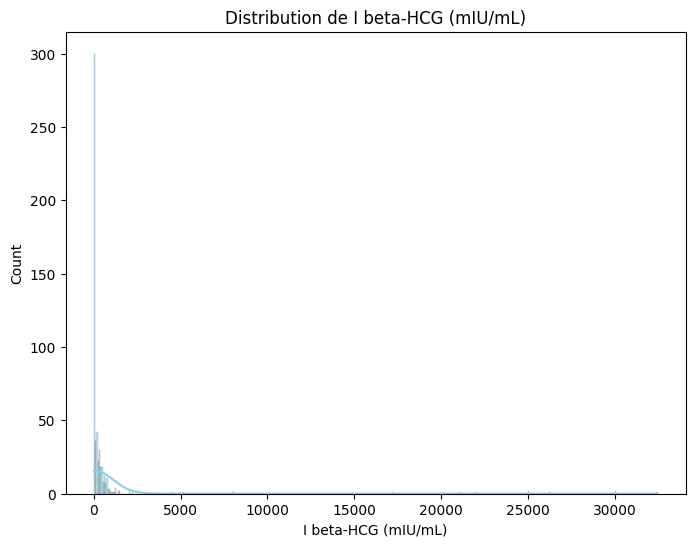

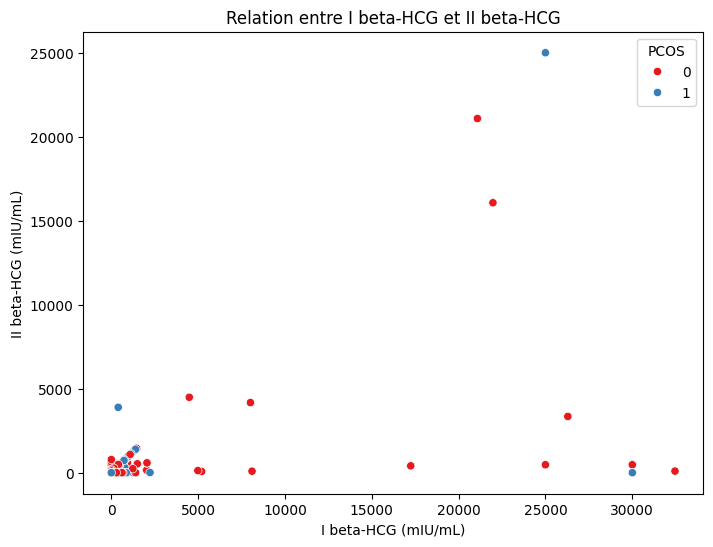

In [18]:

# Suppression des espaces multiples dans les noms des colonnes
di1.columns = di1.columns.str.replace(r'\s+', ' ', regex=True).str.strip()

# Vérification des noms des colonnes après nettoyage
print("Colonnes disponibles après nettoyage :", di1.columns.tolist())

# Visualisation : Distribution des niveaux de I beta-HCG
plt.figure(figsize=(8, 6))
sns.histplot(data=di1, x='I beta-HCG(mIU/mL)', kde=True, color='skyblue')
plt.title('Distribution de I beta-HCG (mIU/mL)')
plt.xlabel('I beta-HCG (mIU/mL)')
plt.show()

# Visualisation de la relation entre I et II beta-HCG
plt.figure(figsize=(8, 6))
sns.scatterplot(x='I beta-HCG(mIU/mL)', y='II beta-HCG(mIU/mL)',
                data=di1, hue='PCOS (Y/N)', palette='Set1')
plt.title('Relation entre I beta-HCG et II beta-HCG')
plt.xlabel('I beta-HCG (mIU/mL)')
plt.ylabel('II beta-HCG (mIU/mL)')
plt.legend(title='PCOS')
plt.show()
